In [1]:
!pip install scikit-learn

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import json
import glob
import os
import copy
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [4]:
def plot_coordinates(pts):
    return pts[:,0], pts[:,1], pts[:,2]

def plot_coordinates_2d(pts):
    return pts[:,0], pts[:,1]

In [5]:
plt.close('all')

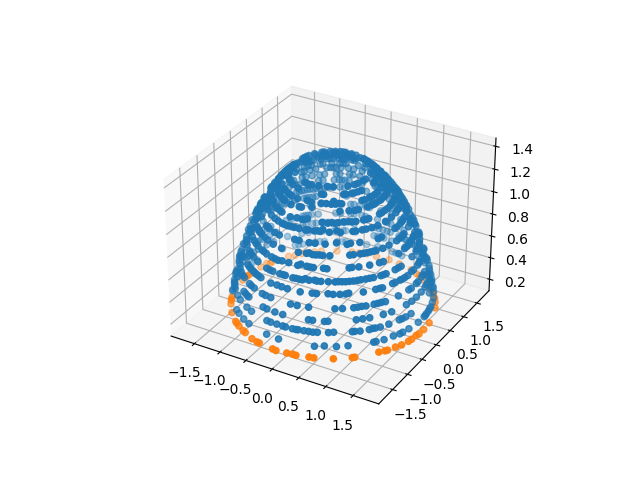

In [6]:
scene_dir = "/home/ccl/Datasets/NeRF/ScanNerf/airplane1"
out_filename = "train_equator_25.json"
train_json_path = os.path.join(scene_dir, "train_all.json")
out_json_path = os.path.join(scene_dir, out_filename)

n_points = 25

data = json.load(open(train_json_path))


transforms = np.stack([frame["transform_matrix"] for frame in data["frames"]])
train_pts = transforms[:,:3,3]
condition = train_pts[:,2] < 0.25

inliers = np.where(condition)
outliers = np.where(np.logical_not(condition))
train_filtered_pts = train_pts[inliers]
train_culled_pts = train_pts[outliers]

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(*plot_coordinates(train_culled_pts))
ax.scatter(*plot_coordinates(train_filtered_pts))

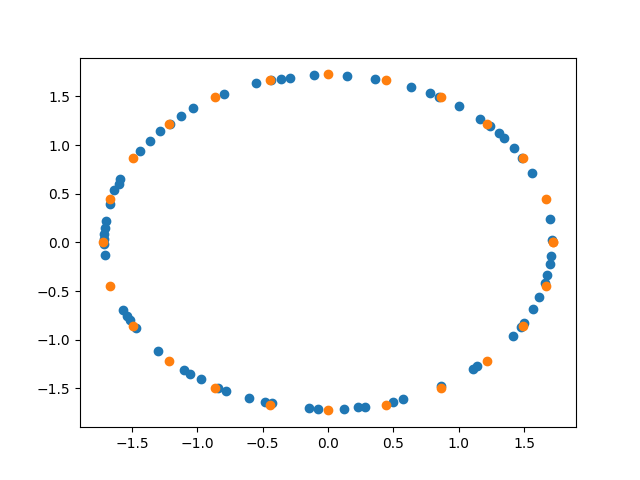

In [7]:


train_x_y = train_filtered_pts[:,(0,1)]
shadow_length = np.linalg.norm(train_x_y, axis=1)
r = np.max(shadow_length)
z = np.mean(train_filtered_pts[:,2])
theta = np.linspace(0, 2*np.pi, num=n_points)
equator_pts = np.stack([r*np.cos(theta), r*np.sin(theta)], axis=1)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(*plot_coordinates_2d(train_x_y))
ax.scatter(*plot_coordinates_2d(equator_pts))

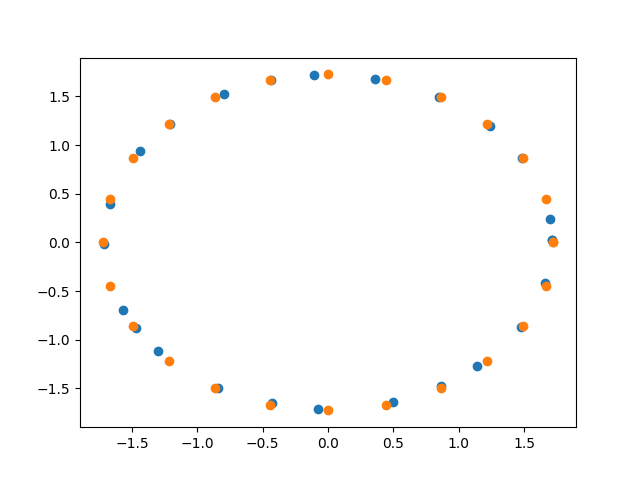

In [8]:
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(train_x_y)
distances, indices = nbrs.kneighbors(equator_pts)

train_equator_pts = train_x_y[indices][:,0,:]

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(*plot_coordinates_2d(train_equator_pts))
ax.scatter(*plot_coordinates_2d(equator_pts))

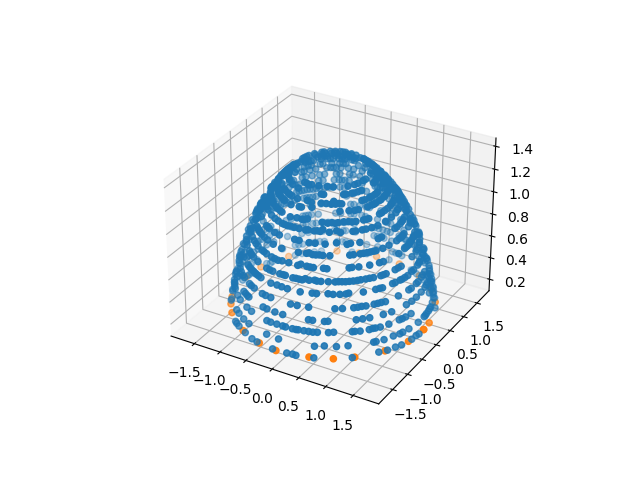

In [9]:
img_ids = inliers[0][indices[:,0]]
# inliers
# indices[:,0]
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(*plot_coordinates(np.delete(train_pts, img_ids, axis=0)))
ax.scatter(*plot_coordinates(train_pts[img_ids]))

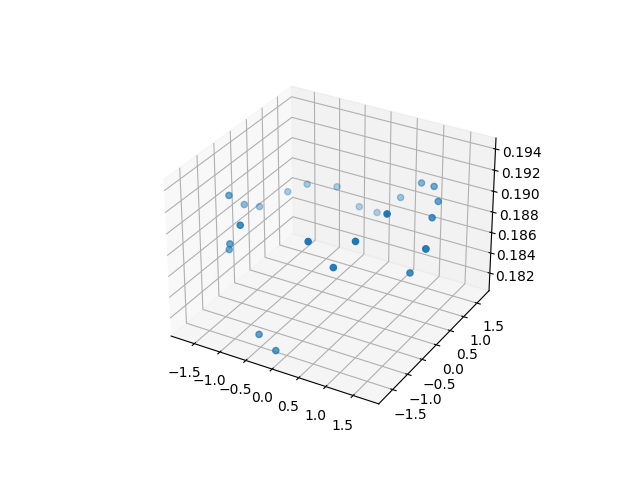

In [10]:


new_data = copy.deepcopy(data)
new_data["frames"] = [new_data["frames"][i] for i in img_ids]
new_pts = np.stack([frame["transform_matrix"] for frame in new_data["frames"]])[:,:3,3]

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(*plot_coordinates(new_pts))

In [11]:
with open(out_json_path, "w") as outfile:
    json.dump(new_data, outfile)

In [12]:
%matplotlib inline
plt.close("all")

Saved to: /home/ccl/Datasets/NeRF/ScanNerf/lego/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/triceratops/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/airplane2/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/plant2/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/shark/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/bulldozer1/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/truck/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/plant5/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/plant6/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/giraffe/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/zebra/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/lion/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/trex/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/cheetah/train_equ

/tmp/ipykernel_40025/1483620130.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


Saved to: /home/ccl/Datasets/NeRF/ScanNerf/forklift/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/plant7/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/roadroller/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/tiger/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/plant1/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/plant9/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/elephant/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/tractor/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/excavator/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/dump_truck1/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/helicopter1/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/plant3/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNerf/airplane1/train_equator_50.json
Saved to: /home/ccl/Datasets/NeRF/ScanNe

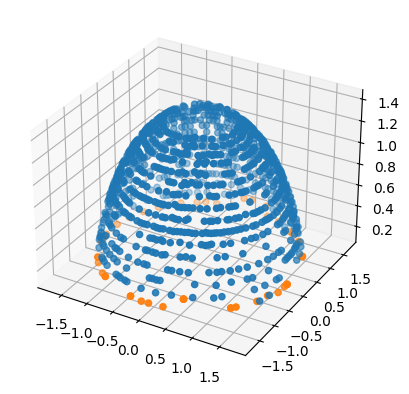

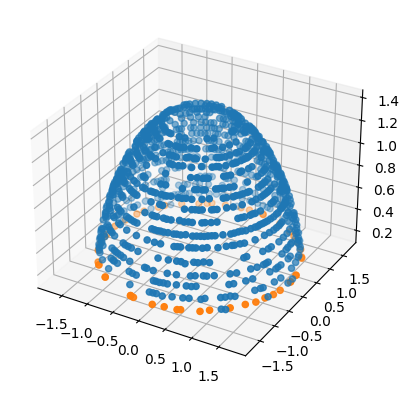

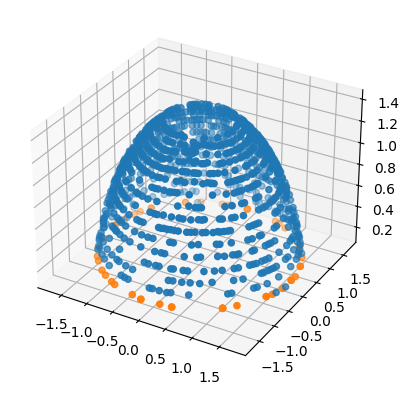

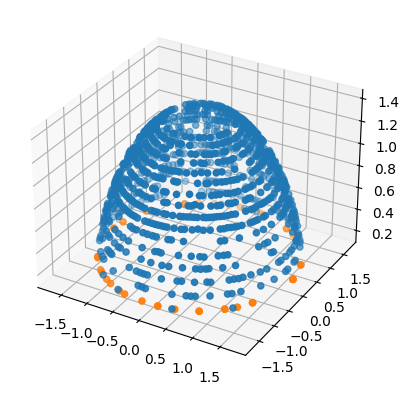

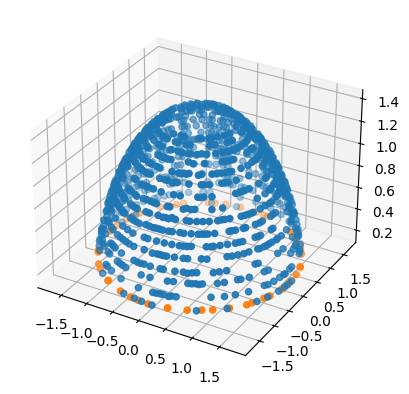

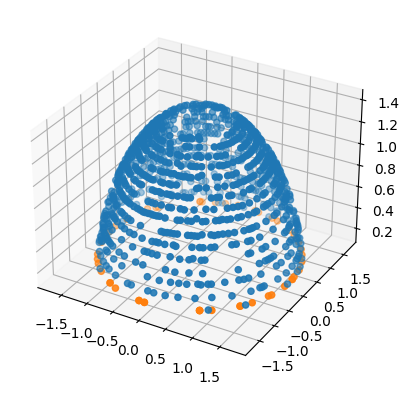

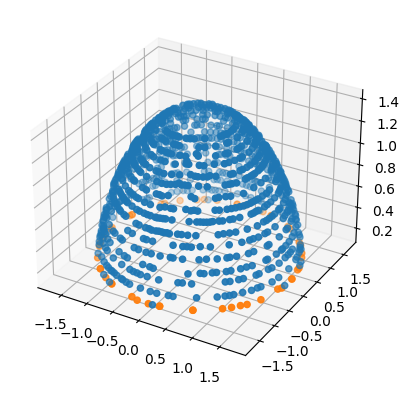

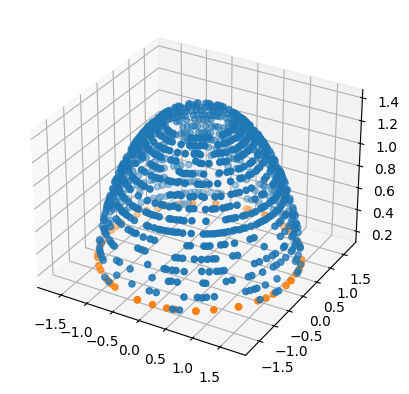

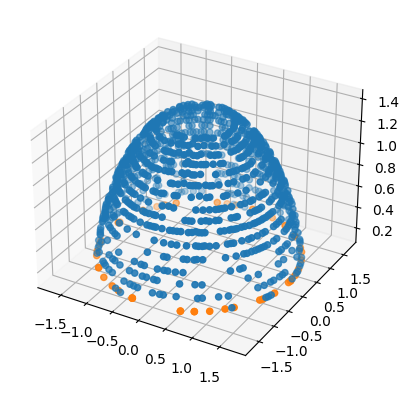

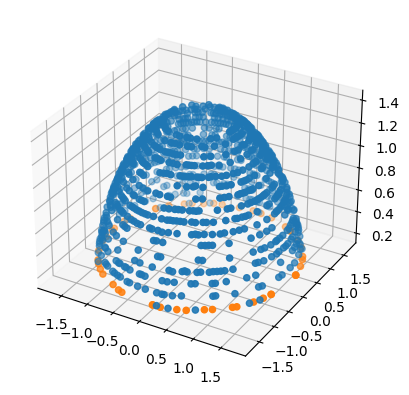

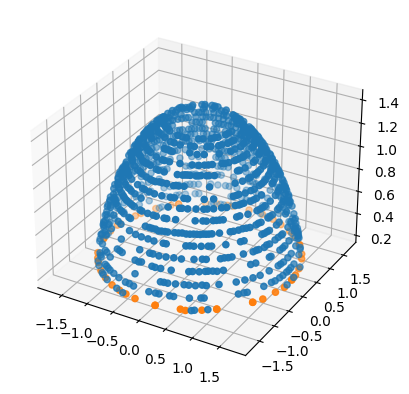

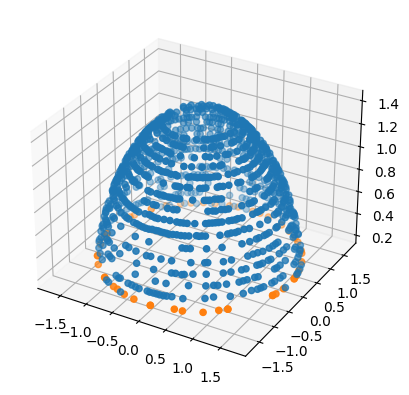

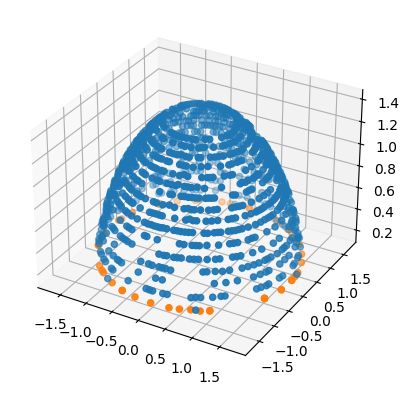

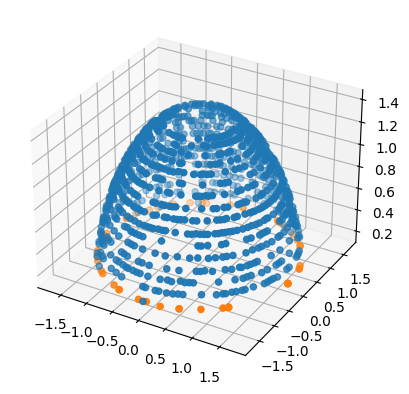

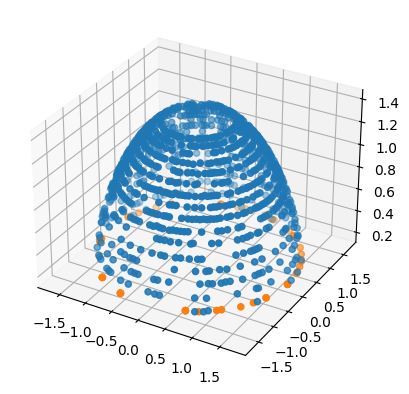

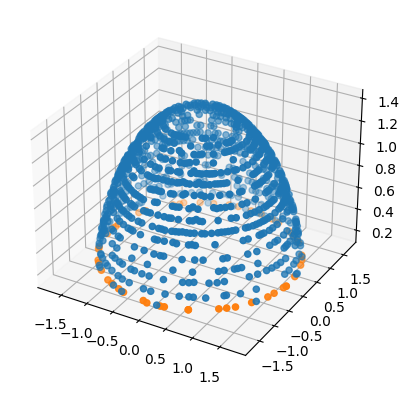

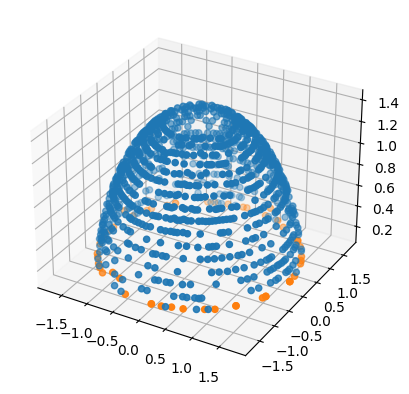

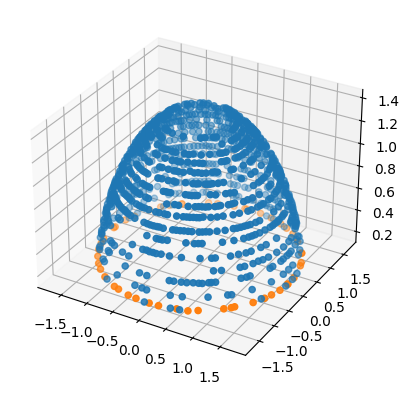

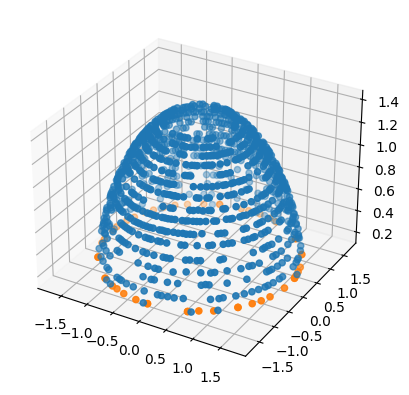

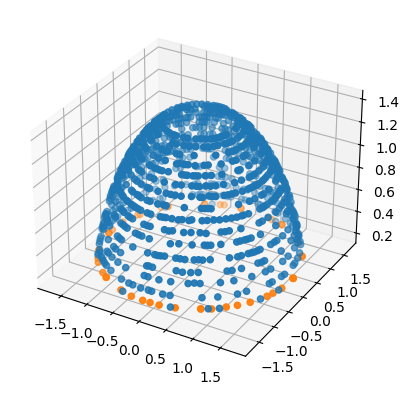

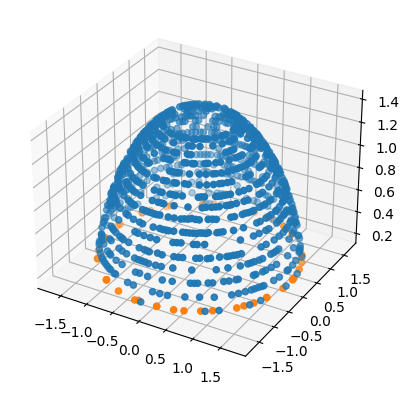

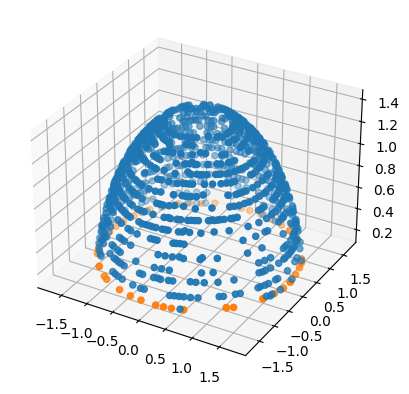

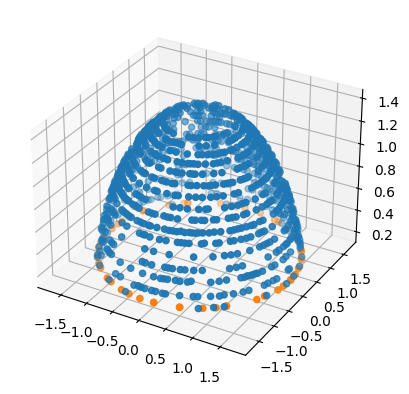

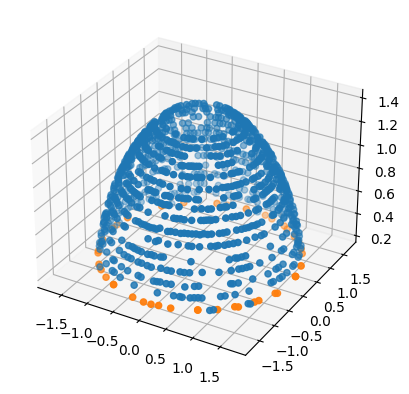

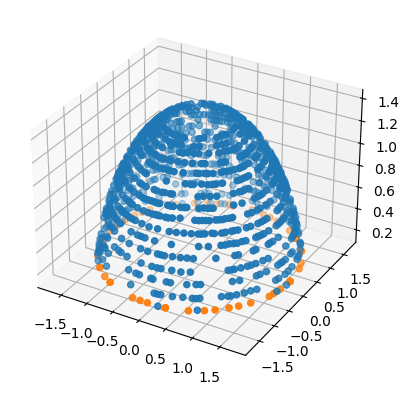

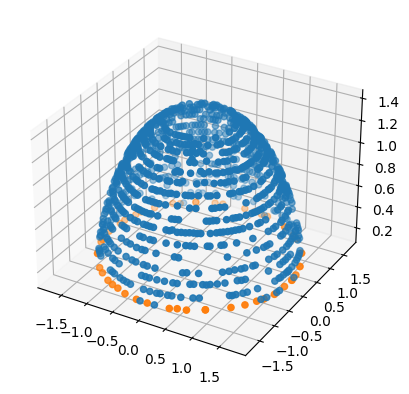

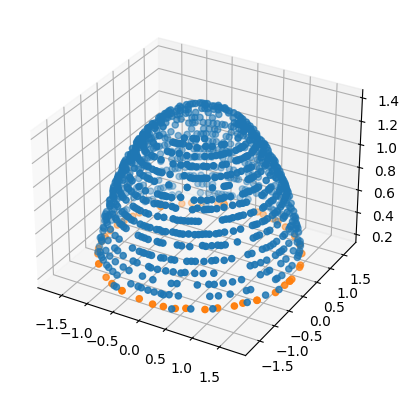

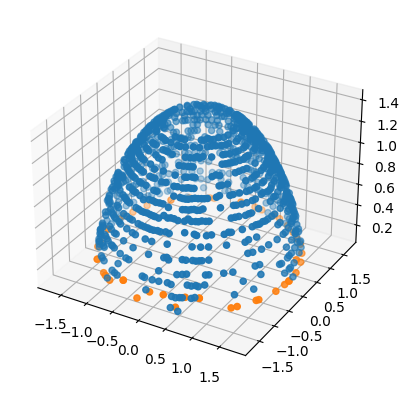

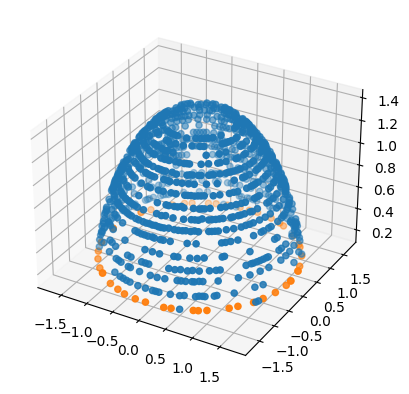

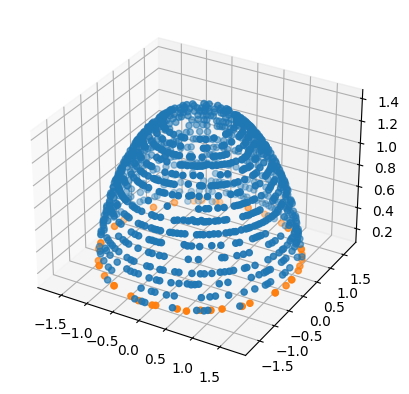

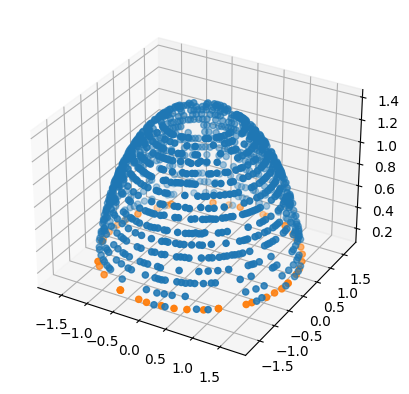

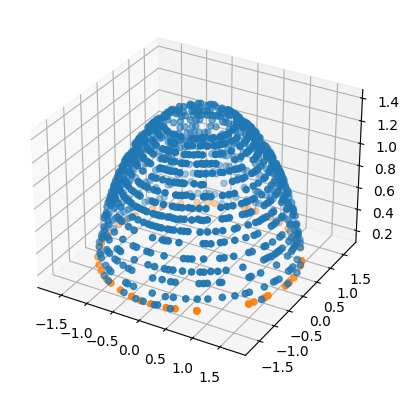

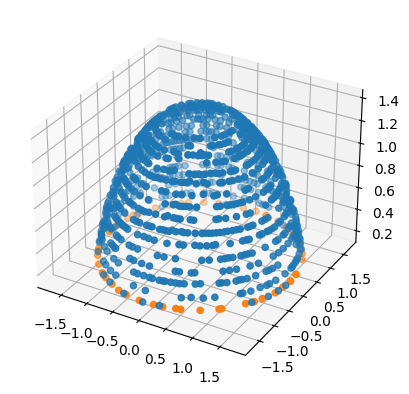

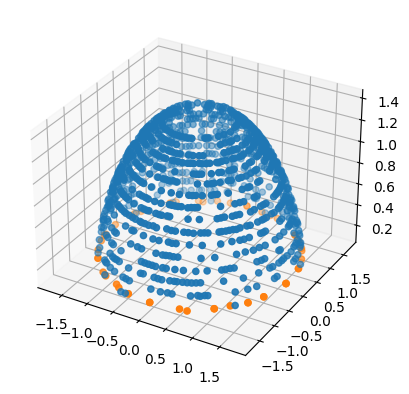

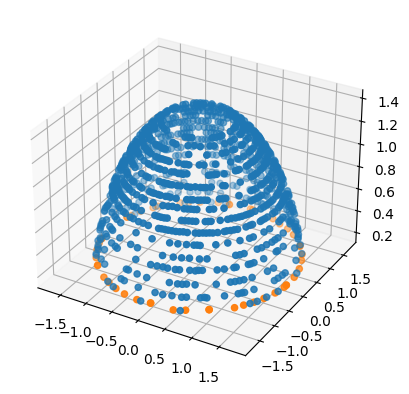

In [13]:
out_filename = "train_equator_50.json"

n_points = 50
json_paths = glob.glob("/home/ccl/Datasets/NeRF/ScanNerf/*/train_all.json")

for train_json_path in json_paths:
    out_json_path = os.path.join(os.path.dirname(train_json_path), out_filename)
    data = json.load(open(train_json_path))

    transforms = np.stack([frame["transform_matrix"] for frame in data["frames"]])
    train_pts = transforms[:,:3,3]
    condition = train_pts[:,2] < 0.25

    inliers = np.where(condition)
    outliers = np.where(np.logical_not(condition))
    train_filtered_pts = train_pts[inliers]
    train_culled_pts = train_pts[outliers]
    train_x_y = train_filtered_pts[:,(0,1)]
    shadow_length = np.linalg.norm(train_x_y, axis=1)
    r = np.max(shadow_length)
    z = np.mean(train_filtered_pts[:,2])
    theta = np.linspace(0, 2*np.pi, num=n_points)
    equator_pts = np.stack([r*np.cos(theta), r*np.sin(theta)], axis=1)
    
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(train_x_y)
    distances, indices = nbrs.kneighbors(equator_pts)
    train_equator_pts = train_x_y[indices][:,0,:]
    
    img_ids = inliers[0][indices[:,0]]
    
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    ax.scatter(*plot_coordinates(np.delete(train_pts, img_ids, axis=0)))
    ax.scatter(*plot_coordinates(train_pts[img_ids]))
    
    new_data = copy.deepcopy(data)
    new_data["frames"] = [new_data["frames"][i] for i in img_ids]
    
#     new_pts = np.stack([frame["transform_matrix"] for frame in new_data["frames"]])[:,:3,3]

#     fig = plt.figure()
#     ax = fig.add_subplot(projection="3d")
#     ax.scatter(*plot_coordinates(new_pts))
    
    with open(out_json_path, "w") as outfile:
        json.dump(new_data, outfile)
        print("Saved to:", out_json_path)